In [360]:
import pandas as pd
import seaborn as sns

In [418]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import statsmodels.api as sm

from sklearn.metrics import root_mean_squared_error


In [362]:
print("2")

2


In [363]:
df = pd.read_csv("../data/hour.csv")


In [364]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


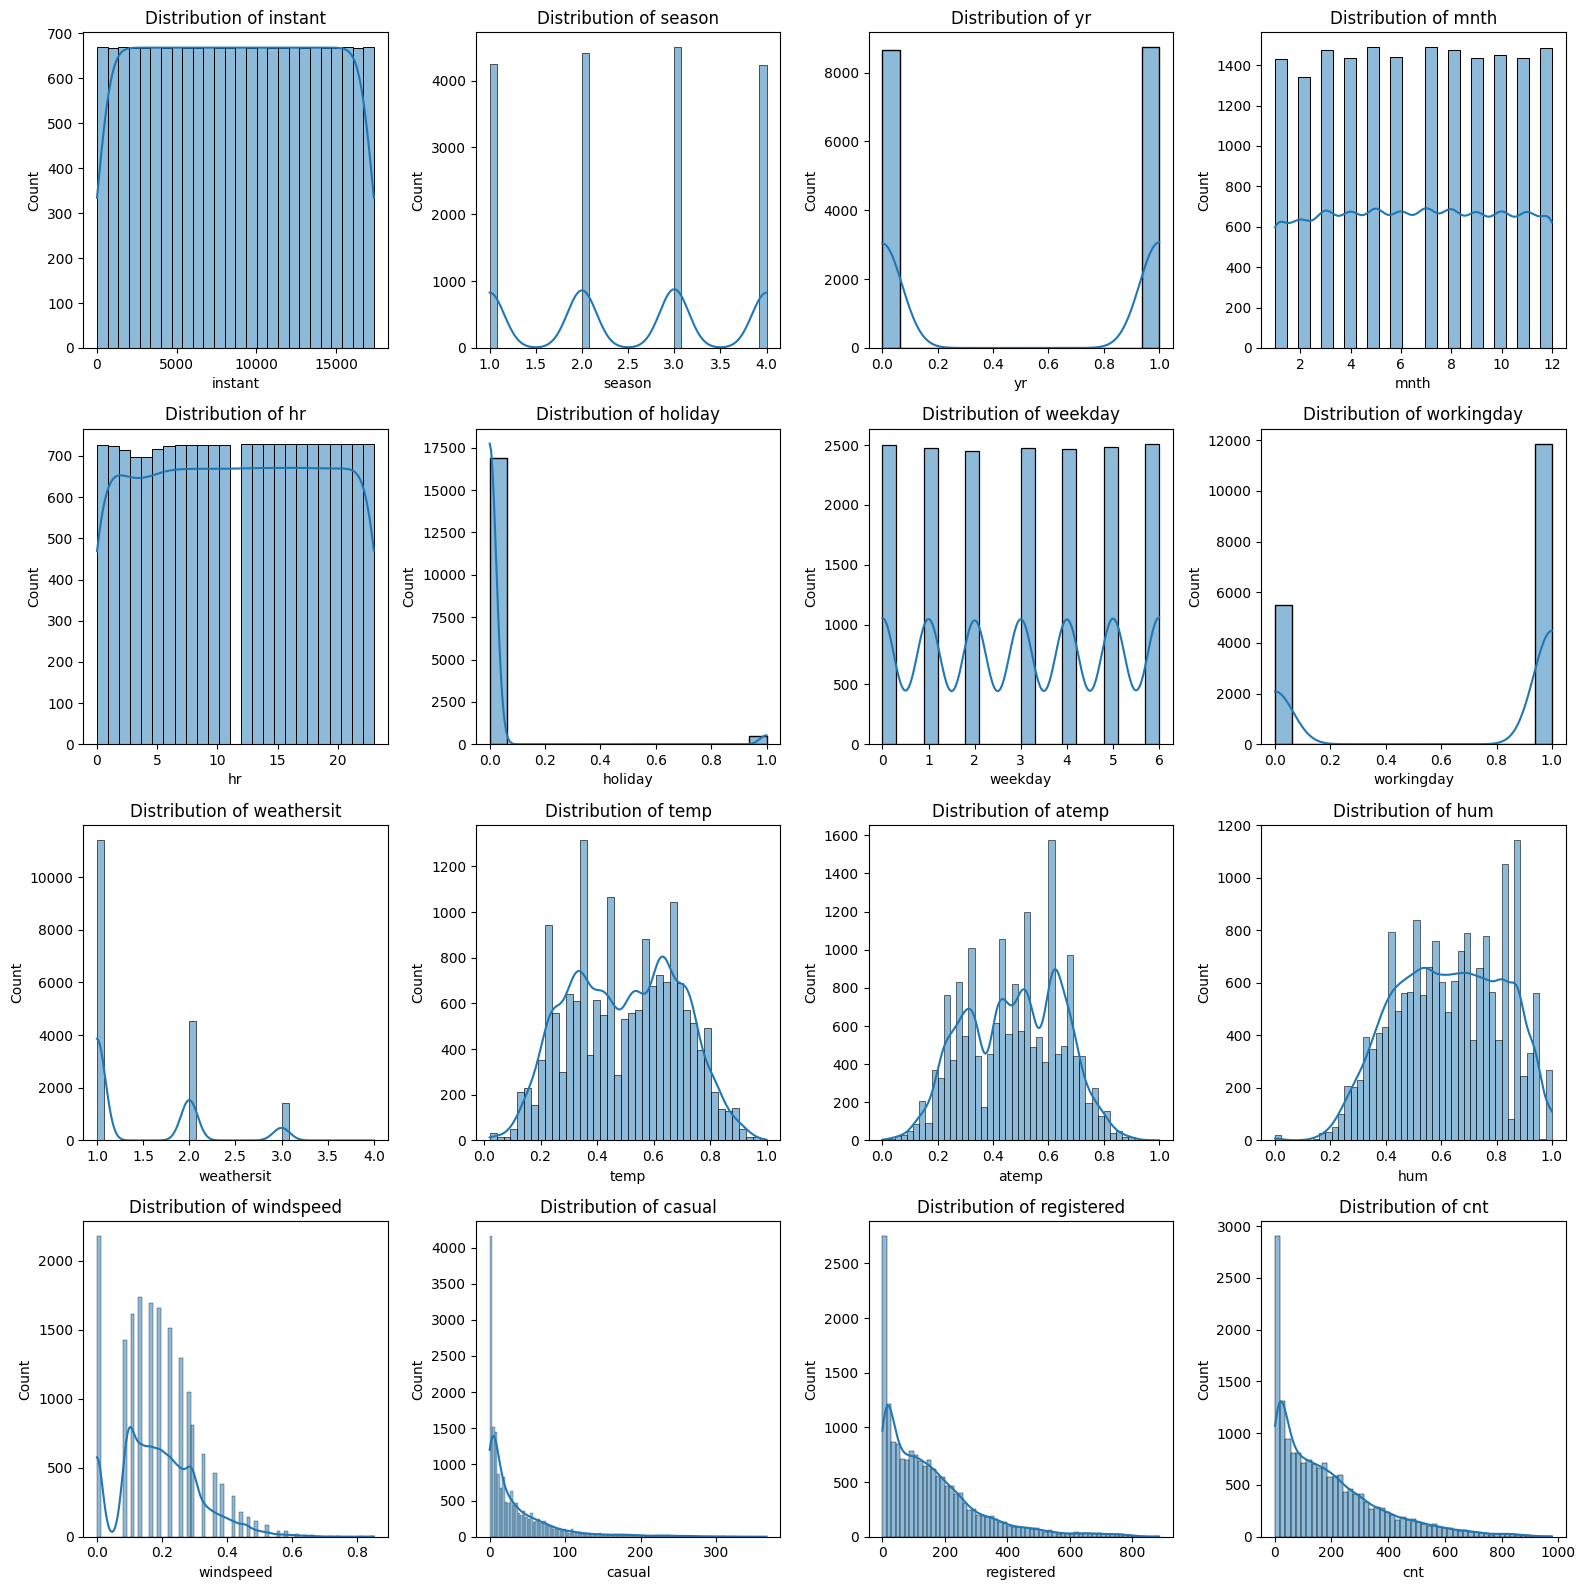

In [365]:
import matplotlib.pyplot as plt
import math

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

n_cols = 4  
n_rows = math.ceil(len(numeric_columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    
for i in range(len(numeric_columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


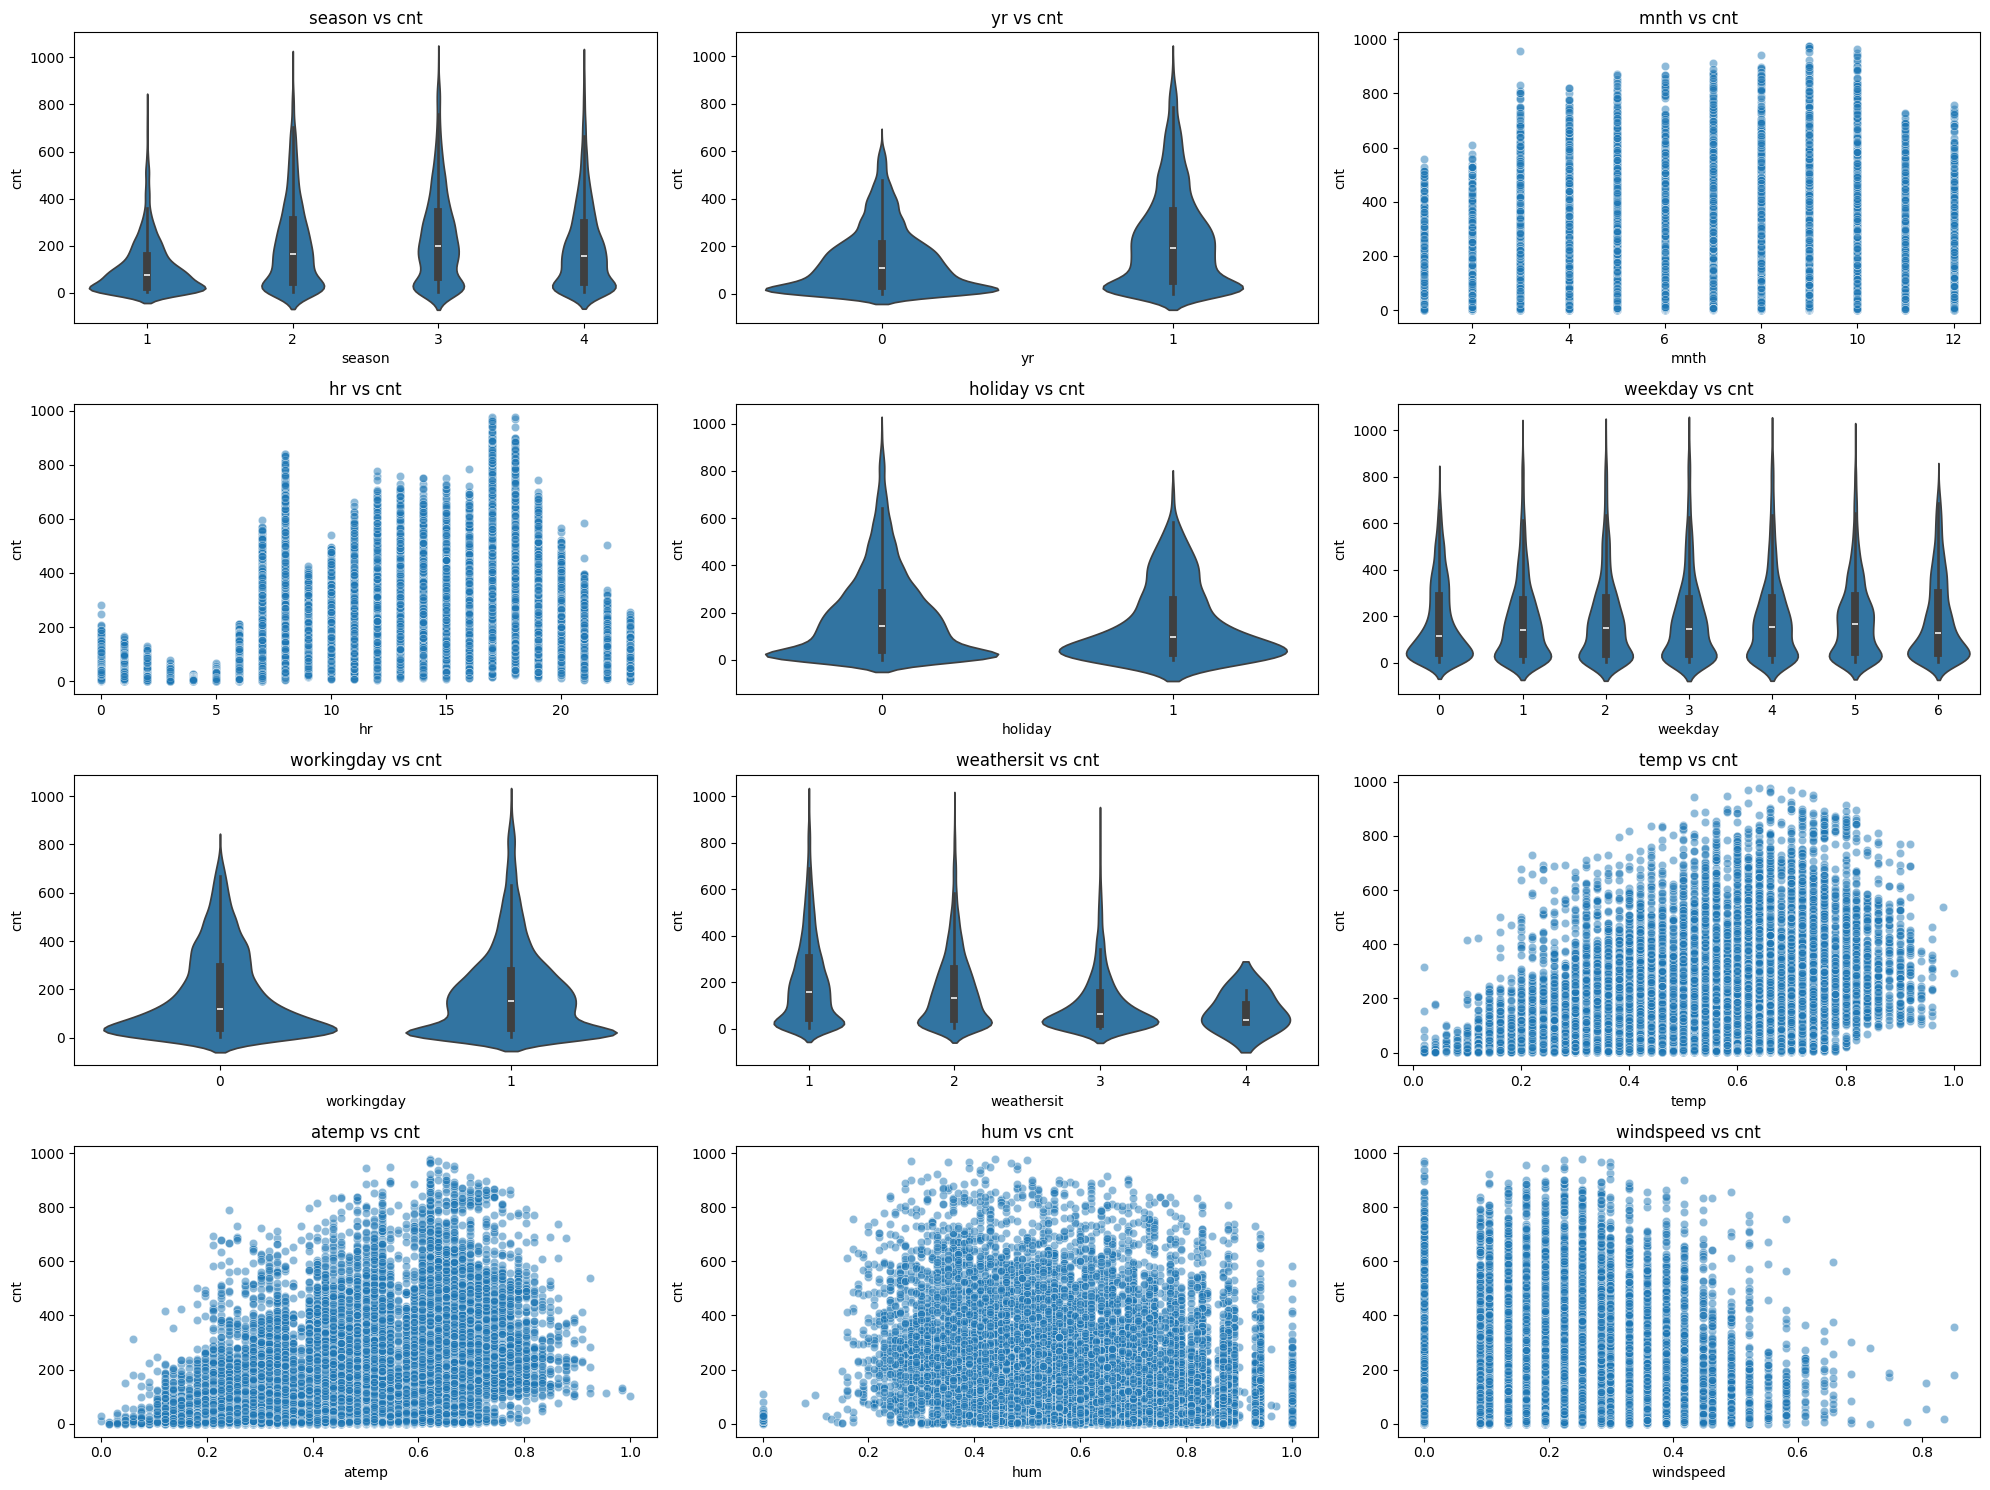

In [366]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 15))

columns_to_plot = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 
                   'weathersit', 'temp', 'atemp', 'hum', 'windspeed']

# Loop and plot each in a subplot
for idx, col in enumerate(columns_to_plot):
    plt.subplot(4, 3, idx + 1)
    if df[col].nunique() < 10:
        # Categorical - use boxplot
        sns.violinplot(x=col, y='cnt', data=df)
    else:
        # Continuous - use scatterplot
        sns.scatterplot(x=col, y='cnt', data=df, alpha=0.5)
    plt.title(f'{col} vs cnt')

plt.tight_layout()
plt.show()


In [367]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Original distribution
# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# plt.hist(y, bins=30)
# plt.title('Original Target Distribution')

# # Log transform (adding 1 to handle zeros)
# y_log = np.log1p(y)  # log(1+y)

# # Show transformed distribution
# plt.subplot(1, 2, 2)
# plt.hist(y_log, bins=30)
# plt.title('Log-Transformed Target Distribution')
# plt.tight_layout()
# plt.show()

/var/folders/rf/2mp9s2ns50x98t5x01tvnt_w0000gp/T/ipykernel_61107/748400084.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


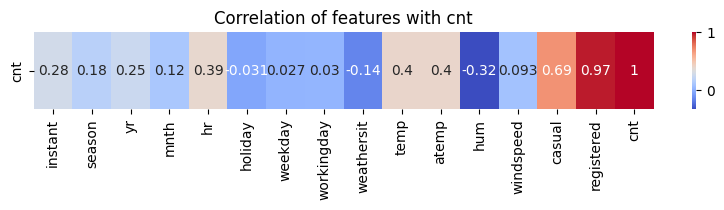

In [375]:
import seaborn as sns
import matplotlib.pyplot as plt


# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap for correlation with 'cnt'
plt.figure(figsize=(10, 1))
sns.heatmap(corr_matrix[['cnt']].T, annot=True, cmap='coolwarm')
plt.title('Correlation of features with cnt')
plt.tight_layout()
plt.show()


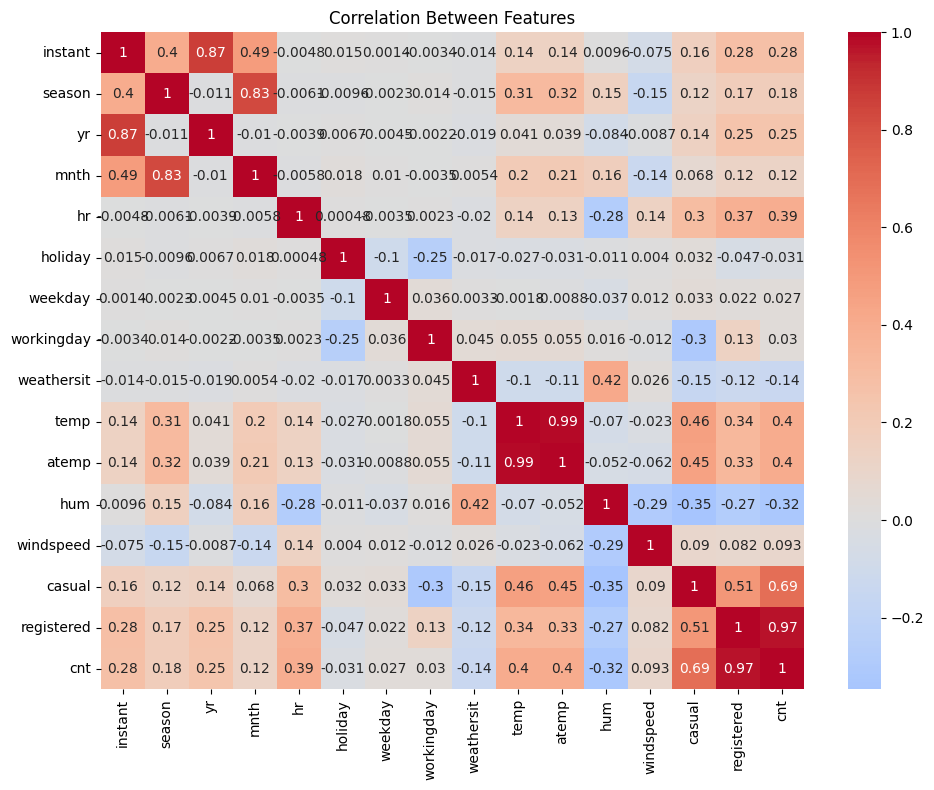

In [369]:
# Full heatmap (excluding target leakage columns)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Features')
plt.tight_layout()
plt.show()


In [376]:
cols_to_drop = ['registered', 'casual' , 'dteday', 'instant']
df_cleaned = df.drop(columns=cols_to_drop)


In [378]:
df_cleaned

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


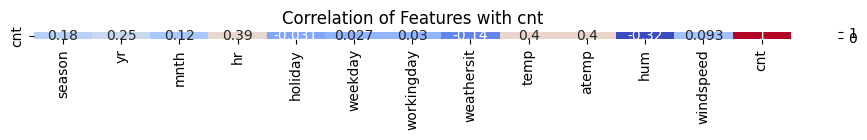

In [380]:

corr_matrix = df_cleaned.corr(numeric_only=True)

# Plot correlation of all features with 'cnt'
plt.figure(figsize=(10, 1.5))
sns.heatmap(corr_matrix[['cnt']].T, annot=True, cmap='coolwarm')
plt.title('Correlation of Features with cnt')
plt.tight_layout()
plt.show()

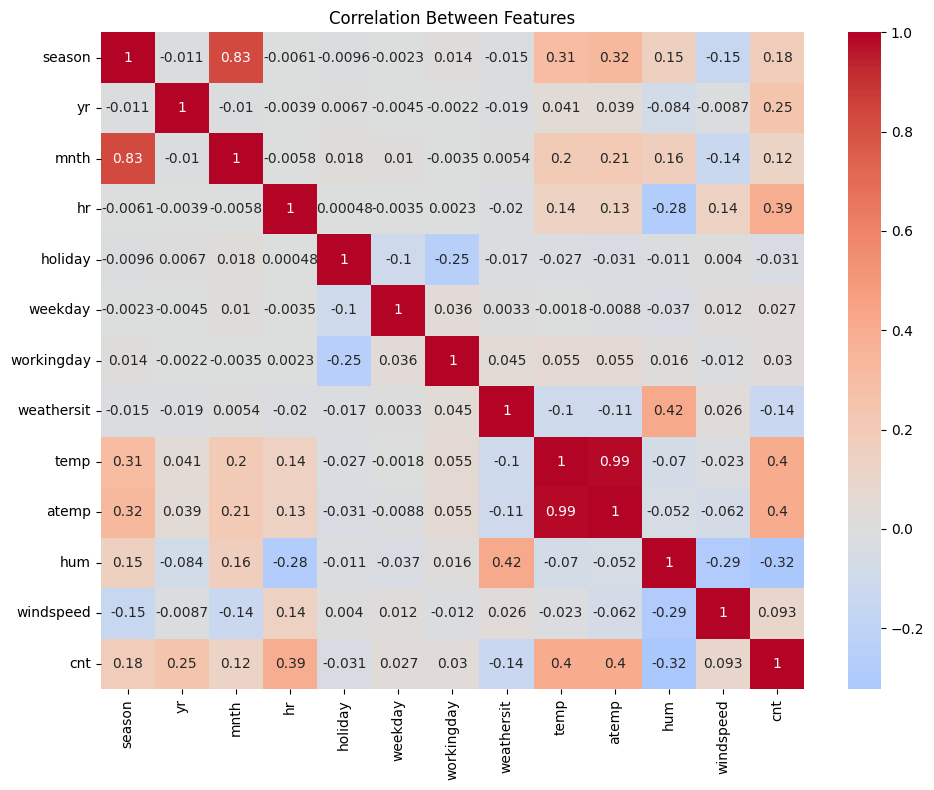

In [381]:
# Full heatmap (excluding target leakage columns)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Features')
plt.tight_layout()
plt.show()

In [405]:


from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

x = df_cleaned.drop('cnt', axis=1)
y = df_cleaned['cnt']     
 
# Scale features and target (important for linear models)
feature_scaler = RobustScaler(quantile_range=(10, 90))  # More conservative scaling
X_scaled = feature_scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [423]:

X_train_lm_1 = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train,X_train_lm_1).fit()

print(lr_1.summary())

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

# y_pred = np.expm1(y_pred_log)  # Convert back to original scale
# y_test = np.expm1(y_test_log)  # Convert test values back too

# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f"RMSE on original scale: {rmse}")
# print(f"RMSE as percentage of mean: {rmse/y.mean()*100:.2f}%")

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
max_err = max_error(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")
print(f"Max Error: {max_err}")



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     741.2
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        19:50:10   Log-Likelihood:                -88655.
No. Observations:               13903   AIC:                         1.773e+05
Df Residuals:                   13890   BIC:                         1.774e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        250.3208      2.298    108.924      0.0

/Users/level3/mlops42/myenv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/level3/mlops42/myenv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/level3/mlops42/myenv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [413]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import RobustScaler
from scipy.stats import mstats



# Scale using RobustScaler
scaler = RobustScaler(quantile_range=(5, 95))  # Less sensitive to outliers
X_scaled = scaler.fit_transform(x)


In [414]:
from scipy.stats import mstats

# Winsorize extreme values (clip top/bottom 1%)
X_train = pd.DataFrame(
    mstats.winsorize(X_scaled, limits=[0.01, 0.01], axis=0),
    columns=x.columns
)


X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.2, random_state=42)

# Scale features and target (important for linear models)
feature_scaler = RobustScaler(quantile_range=(10, 90))  # More conservative scaling
X_train_scaled = feature_scaler.fit_transform(X_train)
X_test_scaled = feature_scaler.transform(X_test)

# Scale target if large values exist
if y_train.max() > 1e4:
    y_scaler = RobustScaler()
    y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
else:
    y_train_scaled = y_train.copy()

In [409]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)

# Add small noise to prevent perfect collinearity
X_train_scaled += np.random.normal(0, 1e-8, size=X_train_scaled.shape)

model.fit(X_train_scaled, y_train_scaled)

# Check model health
print("Max coefficient:", np.max(np.abs(model.coef_)))  # Now should be smaller
print("Condition number:", np.linalg.cond(X_train_scaled.T @ X_train_scaled))  # Should be < 1e10

Max coefficient: 144.94334695855733
Condition number: 525.2954196735056


/var/folders/rf/2mp9s2ns50x98t5x01tvnt_w0000gp/T/ipykernel_61107/3815341770.py:12: RuntimeWarning: divide by zero encountered in matmul
  print("Condition number:", np.linalg.cond(X_train_scaled.T @ X_train_scaled))  # Should be < 1e10
/var/folders/rf/2mp9s2ns50x98t5x01tvnt_w0000gp/T/ipykernel_61107/3815341770.py:12: RuntimeWarning: overflow encountered in matmul
  print("Condition number:", np.linalg.cond(X_train_scaled.T @ X_train_scaled))  # Should be < 1e10
/var/folders/rf/2mp9s2ns50x98t5x01tvnt_w0000gp/T/ipykernel_61107/3815341770.py:12: RuntimeWarning: invalid value encountered in matmul
  print("Condition number:", np.linalg.cond(X_train_scaled.T @ X_train_scaled))  # Should be < 1e10


In [411]:
y_pred_scaled = model.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel() if 'y_scaler' in locals() else y_pred_scaled

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 138.99


/Users/level3/mlops42/myenv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/level3/mlops42/myenv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/level3/mlops42/myenv/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


In [390]:
import numpy as np

print("Any inf in y_test?", np.isinf(y_test).any())
print("Any inf in y_pred?", np.isinf(y_pred).any())
print("Any nan in y_test?", np.isnan(y_test).any())
print("Any nan in y_pred?", np.isnan(y_pred).any())
print("Max value in y_pred:", np.max(y_pred))


Any inf in y_test? False
Any inf in y_pred? False
Any nan in y_test? False
Any nan in y_pred? False
Max value in y_pred: 480.0902288780999


In [384]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, max_error


# Initialize and train Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Generate predictions using Random Forest
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Random Forest RMSE: {rmse_rf}")

# To understand the scale of the error relative to the data
print(f"Mean of target: {y.mean()}")
print(f"Standard deviation of target: {y.std()}")
print(f"RMSE as percentage of mean: {rmse_rf/y.mean()*100:.2f}%")

ValueError: Input contains infinity or a value too large for dtype('float64').

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Train the model
print("starts training")
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse_XG = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"xgboost Forest RMSE: {rmse_XG}")

# To understand the scale of the error relative to the data
print(f"Mean of target: {y.mean()}")
print(f"Standard deviation of target: {y.std()}")
print(f"RMSE as percentage of mean: {rmse_XG/y.mean()*100:.2f}%")
